In [1]:
import json

def parse_json(json_str):
    obj_json = json.loads(json_str)
    result = {
        'fcode': [],
        'tcode': [],
        'price_fare': [],
        'price_charge': [],
        'time_walk': [], 
        'time_other': [],
        'time_board': [],
        'summary': [],
    }
    courses = obj_json['ResultSet']['Course'] if type(obj_json['ResultSet']['Course']) == list else [obj_json['ResultSet']['Course']]
    for course in courses:
        # 料金
        price_fare = 0
        price_charge = 0
        for price in course['Price']:
            if price['kind'] == 'FareSummary':
                price_fare = int(price['Oneway'])
            if price['kind'] == 'ChargeSummary':
                price_charge = int(price['Oneway'])
        result['price_fare'].append(price_fare)
        result['price_charge'].append(price_charge)
        
        route = course['Route']

        # 時間
        result['time_walk'].append(int(route['timeWalk']))
        result['time_other'].append( int(route['timeOther']))
        result['time_board'].append(int(route['timeOnBoard']))

        # 行程表
        if type(route['Line']) == list:
            lines = [l['TypicalName'] for l in route['Line']] + ['']
        else:
            lines = route['Line']['TypicalName']
        stations = [p['Station']['Name'] for p in route['Point']]
        summary = ''
        for l, s in zip(lines, stations):
            summary += f'{s}-{l}->'
        result['summary'].append(summary[:-3])

        # 出発到着駅
        result['fcode'].append(route['Point'][0]['Station']['code'])
        result['tcode'].append(route['Point'][-1]['Station']['code'])
    return result


In [2]:
import glob
import pandas

#空のdataframeを生成しておく
df = None

err = []

result_files = glob.glob('../data/result/*.json')
for result_file in result_files:
    print(result_file)
    try:
        with open(result_file) as f:
            json_str = f.read()
            ret = parse_json(json_str)

            if df is None:
                df = pandas.DataFrame(ret)
            else:
                df = pandas.concat([df, pandas.DataFrame(ret)])
    except Exception as e:
        print(e)
        err.append([result_file,e])
        
df.reset_index().to_csv('../data/result_2/result.tsv', sep='\t', index=False)

print(err)

../data/result/25853_25188_20230401_none.json
../data/result/25853_23060_20230401_none.json
../data/result/25853_27036_20230401_none.json
../data/result/25853_23859_20230401_none.json
../data/result/25853_21176_20230401_none.json
../data/result/25853_26235_20230401_none.json
../data/result/25853_26876_20230401_none.json
../data/result/25853_24633_20230401_none.json
../data/result/25853_27526_20230401_none.json
../data/result/25853_28626_20230401_none.json
../data/result/25853_28975_20230401_none.json
../data/result/25853_26725_20230401_none.json
../data/result/25853_21466_20230401_none.json
../data/result/25853_20936_20230401_none.json
../data/result/25853_28645_20230401_none.json
../data/result/25853_28187_20230401_none.json
../data/result/25853_22843_20230401_none.json
../data/result/25853_27545_20230401_none.json
../data/result/25853_26815_20230401_none.json
../data/result/25853_21405_20230401_none.json
../data/result/25853_29446_20230401_none.json
../data/result/25853_28916_2023040

../data/result/25853_22152_20230401_none.json
../data/result/25853_20786_20230401_none.json
../data/result/25853_23493_20230401_none.json
../data/result/25853_28007_20230401_none.json
../data/result/25853_27307_20230401_none.json
../data/result/25853_21095_20230401_none.json
../data/result/25853_23912_20230401_none.json
../data/result/25853_22442_20230401_none.json
../data/result/25853_23641_20230401_none.json
../data/result/25853_21804_20230401_none.json
../data/result/25853_23183_20230401_none.json
../data/result/25853_29847_20230401_none.json
../data/result/25853_23397_20230401_none.json
../data/result/25853_23455_20230401_none.json
../data/result/25853_20740_20230401_none.json
../data/result/25853_22905_20230401_none.json
../data/result/25853_21229_20230401_none.json
../data/result/25853_26953_20230401_none.json
../data/result/25853_20813_20230401_none.json
../data/result/25853_25515_20230401_none.json
../data/result/25853_22194_20230401_none.json
../data/result/25853_21281_2023040

../data/result/25853_27150_20230401_none.json
../data/result/25853_28592_20230401_none.json
../data/result/25853_28786_20230401_none.json
../data/result/25853_23312_20230401_none.json
../data/result/25853_24051_20230401_none.json
../data/result/25853_27486_20230401_none.json
../data/result/25853_26685_20230401_none.json
../data/result/25853_29247_20230401_none.json
../data/result/25853_21204_20230401_none.json
../data/result/25853_29585_20230401_none.json
../data/result/25853_27196_20230401_none.json
../data/result/25853_24541_20230401_none.json
../data/result/25853_27654_20230401_none.json
../data/result/25853_21847_20230401_none.json
../data/result/25853_23602_20230401_none.json
../data/result/25853_26457_20230401_none.json
../data/result/25853_25742_20230401_none.json
../data/result/25853_27907_20230401_none.json
../data/result/25853_23168_20230401_none.json
../data/result/25853_21714_20230401_none.json
../data/result/25853_23951_20230401_none.json
../data/result/25853_26395_2023040

../data/result/25853_23281_20230401_none.json
../data/result/25853_25369_20230401_none.json
../data/result/25853_23543_20230401_none.json
../data/result/25853_26845_20230401_none.json
../data/result/25853_26482_20230401_none.json
../data/result/25853_26340_20230401_none.json
../data/result/25853_21003_20230401_none.json
../data/result/25853_21769_20230401_none.json
../data/result/25853_24256_20230401_none.json
../data/result/25853_20843_20230401_none.json
../data/result/25853_27339_20230401_none.json
../data/result/25853_26192_20230401_none.json
../data/result/25853_28800_20230401_none.json
../data/result/25853_28753_20230401_none.json
../data/result/25853_20710_20230401_none.json
../data/result/25853_26903_20230401_none.json
../data/result/25853_21279_20230401_none.json
../data/result/25853_27498_20230401_none.json
../data/result/25853_28863_20230401_none.json
../data/result/25853_24876_20230401_none.json
../data/result/25853_28798_20230401_none.json
../data/result/25853_20820_2023040

../data/result/25853_27677_20230401_none.json
../data/result/25853_23972_20230401_none.json
../data/result/25853_22422_20230401_none.json
../data/result/25853_27924_20230401_none.json
../data/result/25853_26474_20230401_none.json
../data/result/25853_29774_20230401_none.json
../data/result/25853_21807_20230401_none.json
../data/result/25853_28514_20230401_none.json
../data/result/25853_25702_20230401_none.json
../data/result/25853_26417_20230401_none.json
../data/result/25853_23128_20230401_none.json
../data/result/25853_27947_20230401_none.json
../data/result/25853_22441_20230401_none.json
../data/result/25853_23911_20230401_none.json
../data/result/25853_26996_20230401_none.json
../data/result/25853_28004_20230401_none.json
../data/result/25853_23490_20230401_none.json
../data/result/25853_20785_20230401_none.json
../data/result/25853_25578_20230401_none.json
../data/result/25853_24828_20230401_none.json
../data/result/25853_21244_20230401_none.json
../data/result/25853_25212_2023040

../data/result/25853_28512_20230401_none.json
../data/result/25853_28278_20230401_none.json
../data/result/25853_21090_20230401_none.json
../data/result/25853_23917_20230401_none.json
../data/result/25853_21752_20230401_none.json
../data/result/25853_25704_20230401_none.json
../data/result/25853_28571_20230401_none.json
../data/result/25853_25834_20230401_none.json
../data/result/25853_24564_20230401_none.json
../data/result/25853_26318_20230401_none.json
../data/result/25853_29772_20230401_none.json
../data/result/25853_24074_20230401_none.json
../data/result/25853_28858_20230401_none.json
../data/result/25853_22134_20230401_none.json
../data/result/25853_21221_20230401_none.json
../data/result/25853_26162_20230401_none.json
../data/result/25853_24336_20230401_none.json
../data/result/25853_27023_20230401_none.json
../data/result/25853_21609_20230401_none.json
../data/result/25853_28323_20230401_none.json
../data/result/25853_28449_20230401_none.json
../data/result/25853_21163_2023040

../data/result/25853_22776_20230401_none.json
../data/result/25853_27249_20230401_none.json
../data/result/25853_20933_20230401_none.json
../data/result/25853_26720_20230401_none.json
../data/result/25853_26873_20230401_none.json
../data/result/25853_27523_20230401_none.json
../data/result/25853_29934_20230401_none.json
'Course'
../data/result/25853_21977_20230401_none.json
../data/result/25853_26567_20230401_none.json
../data/result/25853_23058_20230401_none.json
../data/result/25853_23222_20230401_none.json
../data/result/25853_27274_20230401_none.json
../data/result/25853_24161_20230401_none.json
../data/result/25853_28174_20230401_none.json
../data/result/25853_29377_20230401_none.json
../data/result/25853_21334_20230401_none.json
../data/result/25853_20696_20230401_none.json
../data/result/25853_23583_20230401_none.json
../data/result/25853_28117_20230401_none.json
../data/result/25853_23241_20230401_none.json
../data/result/25853_21357_20230401_none.json
../data/result/25853_2191

../data/result/25853_20826_20230401_none.json
../data/result/25853_25520_20230401_none.json
../data/result/25853_20775_20230401_none.json
../data/result/25853_23460_20230401_none.json
../data/result/25853_26966_20230401_none.json
../data/result/25853_27436_20230401_none.json
../data/result/25853_25588_20230401_none.json
../data/result/25853_28736_20230401_none.json
../data/result/25853_26656_20230401_none.json
../data/result/25853_20845_20230401_none.json
../data/result/25853_28755_20230401_none.json
../data/result/25853_24740_20230401_none.json
../data/result/25853_27455_20230401_none.json
../data/result/25853_26905_20230401_none.json
../data/result/25853_23403_20230401_none.json
../data/result/25853_25229_20230401_none.json
../data/result/25853_23982_20230401_none.json
../data/result/25853_29784_20230401_none.json
../data/result/25853_21005_20230401_none.json
../data/result/25853_22310_20230401_none.json
../data/result/25853_23679_20230401_none.json
../data/result/25853_26346_2023040

../data/result/25853_23981_20230401_none.json
../data/result/25853_21006_20230401_none.json
../data/result/25853_28756_20230401_none.json
../data/result/25853_24081_20230401_none.json
../data/result/25853_27456_20230401_none.json
../data/result/25853_24743_20230401_none.json
../data/result/25853_22950_20230401_none.json
../data/result/25853_28094_20230401_none.json
../data/result/25853_23400_20230401_none.json
../data/result/25853_20715_20230401_none.json
../data/result/25853_25540_20230401_none.json
../data/result/25853_24810_20230401_none.json
../data/result/25853_21516_20230401_none.json
../data/result/25853_28805_20230401_none.json
../data/result/25853_26197_20230401_none.json
../data/result/25853_25282_20230401_none.json
../data/result/25853_24315_20230401_none.json
../data/result/25853_21140_20230401_none.json
../data/result/25853_22255_20230401_none.json
../data/result/25853_21979_20230401_none.json
../data/result/25853_29379_20230401_none.json
../data/result/25853_26840_2023040

../data/result/25853_23894_20230401_none.json
../data/result/25853_21113_20230401_none.json
../data/result/25853_22206_20230401_none.json
../data/result/25853_24194_20230401_none.json
../data/result/25853_21369_20230401_none.json
../data/result/25853_24656_20230401_none.json
../data/result/25853_27543_20230401_none.json
../data/result/25853_28181_20230401_none.json
../data/result/25853_23515_20230401_none.json
../data/result/25853_21403_20230401_none.json
../data/result/25853_20953_20230401_none.json
../data/result/25853_28910_20230401_none.json
../data/result/25853_25397_20230401_none.json
../data/result/25853_28129_20230401_none.json
../data/result/25853_24635_20230401_none.json
../data/result/25853_27520_20230401_none.json
../data/result/25853_26870_20230401_none.json
../data/result/25853_29349_20230401_none.json
../data/result/25853_27588_20230401_none.json
../data/result/25853_29423_20230401_none.json
../data/result/25853_28973_20230401_none.json
../data/result/25853_20930_2023040

../data/result/25853_25445_20230401_none.json
../data/result/25853_20943_20230401_none.json
../data/result/25853_29392_20230401_none.json
../data/result/25853_22706_20230401_none.json
../data/result/25853_21413_20230401_none.json
../data/result/25853_27553_20230401_none.json
../data/result/25853_21379_20230401_none.json
../data/result/25853_27291_20230401_none.json
../data/result/25853_24184_20230401_none.json
../data/result/25853_27062_20230401_none.json
../data/result/25853_24377_20230401_none.json
../data/result/25853_27708_20230401_none.json
../data/result/25853_28672_20230401_none.json
../data/result/25853_21358_20230401_none.json
../data/result/25853_24667_20230401_none.json
../data/result/25853_20631_20230401_none.json
../data/result/25853_27218_20230401_none.json
../data/result/25853_28921_20230401_none.json
../data/result/25853_23547_20230401_none.json
../data/result/25853_24604_20230401_none.json
../data/result/25853_27511_20230401_none.json
../data/result/25853_29378_2023040

../data/result/25853_20881_20230401_none.json
../data/result/25853_29592_20230401_none.json
../data/result/25853_26969_20230401_none.json
../data/result/25853_21213_20230401_none.json
../data/result/25853_28791_20230401_none.json
../data/result/25853_20829_20230401_none.json
../data/result/25853_21579_20230401_none.json
../data/result/25853_27491_20230401_none.json
../data/result/25853_27910_20230401_none.json
../data/result/25853_26440_20230401_none.json
../data/result/25853_25755_20230401_none.json
../data/result/25853_23946_20230401_none.json
../data/result/25853_27129_20230401_none.json
../data/result/25853_29082_20230401_none.json
../data/result/25853_28281_20230401_none.json
../data/result/25853_23401_20230401_none.json
../data/result/25853_28095_20230401_none.json
../data/result/25853_26907_20230401_none.json
../data/result/25853_28757_20230401_none.json
../data/result/25853_28804_20230401_none.json
../data/result/25853_20847_20230401_none.json
../data/result/25853_24028_2023040

../data/result/25853_22687_20230401_none.json
../data/result/25853_21592_20230401_none.json
../data/result/25853_27600_20230401_none.json
../data/result/25853_21813_20230401_none.json
../data/result/25853_21082_20230401_none.json
../data/result/25853_22397_20230401_none.json
../data/result/25853_27953_20230401_none.json
../data/result/25853_22455_20230401_none.json
../data/result/25853_21740_20230401_none.json
../data/result/25853_23905_20230401_none.json
../data/result/25853_23635_20230401_none.json
../data/result/25853_21870_20230401_none.json
../data/result/25853_27663_20230401_none.json
../data/result/25853_25826_20230401_none.json
../data/result/25853_21049_20230401_none.json
../data/result/25853_23966_20230401_none.json
../data/result/25853_22436_20230401_none.json
../data/result/25853_21723_20230401_none.json
../data/result/25853_26460_20230401_none.json
../data/result/25853_28209_20230401_none.json
../data/result/25853_21559_20230401_none.json
../data/result/25853_23325_2023040

../data/result/25853_24327_20230401_none.json
../data/result/25853_29199_20230401_none.json
../data/result/25853_21618_20230401_none.json
../data/result/25853_29690_20230401_none.json
../data/result/25853_21980_20230401_none.json
../data/result/25853_27793_20230401_none.json
../data/result/25853_24486_20230401_none.json
../data/result/25853_24344_20230401_none.json
../data/result/25853_27868_20230401_none.json
../data/result/25853_21401_20230401_none.json
../data/result/25853_20951_20230401_none.json
../data/result/25853_29380_20230401_none.json
../data/result/25853_25457_20230401_none.json
../data/result/25853_26742_20230401_none.json
../data/result/25853_24907_20230401_none.json
../data/result/25853_22847_20230401_none.json
../data/result/25853_27541_20230401_none.json
../data/result/25853_24196_20230401_none.json
../data/result/25853_27283_20230401_none.json
../data/result/25853_22342_20230401_none.json
../data/result/25853_22480_20230401_none.json
../data/result/25853_21795_2023040

../data/result/25853_24369_20230401_none.json
../data/result/25853_21656_20230401_none.json
../data/result/25853_22229_20230401_none.json
../data/result/25853_21905_20230401_none.json
../data/result/25853_28416_20230401_none.json
../data/result/25853_21346_20230401_none.json
../data/result/25853_21484_20230401_none.json
../data/result/25853_26894_20230401_none.json
../data/result/25853_20687_20230401_none.json
../data/result/25853_23678_20230401_none.json
../data/result/25853_21004_20230401_none.json
../data/result/25853_22311_20230401_none.json
../data/result/25853_23983_20230401_none.json
../data/result/25853_21895_20230401_none.json
../data/result/25853_28244_20230401_none.json
../data/result/25853_24593_20230401_none.json
../data/result/25853_27686_20230401_none.json
../data/result/25853_24251_20230401_none.json
../data/result/25853_25738_20230401_none.json
../data/result/25853_28586_20230401_none.json
../data/result/25853_23112_20230401_none.json
../data/result/25853_28807_2023040

../data/result/25853_20854_20230401_none.json
../data/result/25853_23378_20230401_none.json
../data/result/25853_25552_20230401_none.json
../data/result/25853_25290_20230401_none.json
../data/result/25853_26185_20230401_none.json
../data/result/25853_28817_20230401_none.json
../data/result/25853_27189_20230401_none.json
../data/result/25853_21858_20230401_none.json
../data/result/25853_28289_20230401_none.json
../data/result/25853_24234_20230401_none.json
../data/result/25853_23177_20230401_none.json
../data/result/25853_28221_20230401_none.json
../data/result/25853_21571_20230401_none.json
../data/result/25853_20821_20230401_none.json
../data/result/25853_28799_20230401_none.json
../data/result/25853_25527_20230401_none.json
../data/result/25853_28862_20230401_none.json
../data/result/25853_27499_20230401_none.json
../data/result/25853_23467_20230401_none.json
../data/result/25853_27431_20230401_none.json
../data/result/25853_28801_20230401_none.json
../data/result/25853_26193_2023040

../data/result/25853_22026_20230401_none.json
../data/result/25853_27519_20230401_none.json
../data/result/25853_23246_20230401_none.json
../data/result/25853_26779_20230401_none.json
../data/result/25853_28929_20230401_none.json
../data/result/25853_26882_20230401_none.json
../data/result/25853_22787_20230401_none.json
../data/result/25853_21492_20230401_none.json
../data/result/25853_24994_20230401_none.json
../data/result/25853_20639_20230401_none.json
../data/result/25853_29169_20230401_none.json
../data/result/25853_21913_20230401_none.json
../data/result/25853_26269_20230401_none.json
../data/result/25853_27700_20230401_none.json
../data/result/25853_22555_20230401_none.json
../data/result/25853_26503_20230401_none.json
../data/result/25853_29417_20230401_none.json
../data/result/25853_22083_20230401_none.json
../data/result/25853_28947_20230401_none.json
../data/result/25853_21396_20230401_none.json
../data/result/25853_26717_20230401_none.json
../data/result/25853_20904_2023040

../data/result/25853_22212_20230401_none.json
../data/result/25853_21107_20230401_none.json
../data/result/25853_24438_20230401_none.json
../data/result/25853_26244_20230401_none.json
../data/result/25853_25151_20230401_none.json
../data/result/25853_25345_20230401_none.json
../data/result/25853_26869_20230401_none.json
../data/result/25853_21313_20230401_none.json
../data/result/25853_27539_20230401_none.json
../data/result/25853_29350_20230401_none.json
../data/result/25853_20981_20230401_none.json
../data/result/25853_26792_20230401_none.json
../data/result/25853_27591_20230401_none.json
../data/result/25853_21479_20230401_none.json
../data/result/25853_20929_20230401_none.json
../data/result/25853_27253_20230401_none.json
../data/result/25853_24146_20230401_none.json
../data/result/25853_25197_20230401_none.json
../data/result/25853_29640_20230401_none.json
../data/result/25853_21603_20230401_none.json
../data/result/25853_23846_20230401_none.json
../data/result/25853_27029_2023040

../data/result/25853_29776_20230401_none.json
../data/result/25853_26476_20230401_none.json
../data/result/25853_25763_20230401_none.json
../data/result/25853_21735_20230401_none.json
../data/result/25853_21866_20230401_none.json
../data/result/25853_29825_20230401_none.json
'Course'
../data/result/25853_28575_20230401_none.json
../data/result/25853_29208_20230401_none.json
../data/result/25853_21589_20230401_none.json
../data/result/25853_28761_20230401_none.json
../data/result/25853_23437_20230401_none.json
../data/result/25853_20722_20230401_none.json
../data/result/25853_26931_20230401_none.json
../data/result/25853_21521_20230401_none.json
../data/result/25853_24827_20230401_none.json
../data/result/25853_29562_20230401_none.json
../data/result/25853_26999_20230401_none.json
../data/result/25853_28832_20230401_none.json
../data/result/25853_24264_20230401_none.json
../data/result/25853_27171_20230401_none.json
../data/result/25853_27948_20230401_none.json
../data/result/25853_2641

../data/result/25853_28555_20230401_none.json
../data/result/25853_23950_20230401_none.json
../data/result/25853_22400_20230401_none.json
../data/result/25853_21715_20230401_none.json
../data/result/25853_22981_20230401_none.json
../data/result/25853_27345_20230401_none.json
../data/result/25853_24050_20230401_none.json
../data/result/25853_25539_20230401_none.json
../data/result/25853_28787_20230401_none.json
../data/result/25853_23479_20230401_none.json
../data/result/25853_25253_20230401_none.json
../data/result/25853_20897_20230401_none.json
../data/result/25853_29246_20230401_none.json
../data/result/25853_26684_20230401_none.json
../data/result/25853_27007_20230401_none.json
../data/result/25853_24312_20230401_none.json
../data/result/25853_21147_20230401_none.json
../data/result/25853_25928_20230401_none.json
../data/result/25853_21685_20230401_none.json
../data/result/25853_22028_20230401_none.json
../data/result/25853_26847_20230401_none.json
../data/result/25853_27517_2023040

../data/result/25853_27507_20230401_none.json
../data/result/25853_22038_20230401_none.json
../data/result/25853_26857_20230401_none.json
../data/result/25853_20644_20230401_none.json
../data/result/25853_23551_20230401_none.json
[['../data/result/25853_29839_20230401_none.json', KeyError('Course')], ['../data/result/25853_29739_20230401_none.json', KeyError('Course')], ['../data/result/25853_29869_20230401_none.json', KeyError('Course')], ['../data/result/25853_29882_20230401_none.json', KeyError('Course')], ['../data/result/25853_21040_20230401_none.json', KeyError('Course')], ['../data/result/25853_29899_20230401_none.json', KeyError('Course')], ['../data/result/25853_29934_20230401_none.json', KeyError('Course')], ['../data/result/25853_29929_20230401_none.json', KeyError('Course')], ['../data/result/25853_21907_20230401_none.json', KeyError('Course')], ['../data/result/25853_29927_20230401_none.json', KeyError('Course')], ['../data/result/25853_29679_20230401_none.json', KeyError(

In [3]:
err_df = None
for _e in err:
    filename, e = _e
    fcode, tcode, yyyymmdd, cond = filename.replace('./result/', '').replace('.json', '').split('_')
    row = {'fcode':[fcode], 'tcode':[tcode], 'yyyymmdd': [yyyymmdd], 'cond': [cond], 'cause': [str(e)]}
    if err_df is None:
        err_df = pandas.DataFrame(row)
    else:
        err_df = pandas.concat([err_df, pandas.DataFrame(row)])
print(err_df)

                  fcode  tcode  yyyymmdd  cond     cause
0  ../data/result/25853  29839  20230401  none  'Course'
0  ../data/result/25853  29739  20230401  none  'Course'
0  ../data/result/25853  29869  20230401  none  'Course'
0  ../data/result/25853  29882  20230401  none  'Course'
0  ../data/result/25853  21040  20230401  none  'Course'
0  ../data/result/25853  29899  20230401  none  'Course'
0  ../data/result/25853  29934  20230401  none  'Course'
0  ../data/result/25853  29929  20230401  none  'Course'
0  ../data/result/25853  21907  20230401  none  'Course'
0  ../data/result/25853  29927  20230401  none  'Course'
0  ../data/result/25853  29679  20230401  none  'Course'
0  ../data/result/25853  29812  20230401  none  'Course'
0  ../data/result/25853  29897  20230401  none  'Course'
0  ../data/result/25853  29841  20230401  none  'Course'
0  ../data/result/25853  29186  20230401  none  'Course'
0  ../data/result/25853  29936  20230401  none  'Course'
0  ../data/result/25853  29840 

In [4]:
stn_df = pandas.read_table('../data/master/station_master.tsv',
                                                  names=('code', 'name', 'type', 'pref_code', 'pref_name', 'lat', 'lon'),
                                                  dtype=str)
err_df_2 = pandas.merge(err_df, stn_df[['code','name']], how='inner', left_on='tcode', right_on='code')
err_df_2.rename({'name': 'to_name'}, inplace=True)
err_df_2 = pandas.merge(err_df_2, stn_df[['code','name']], how='inner', left_on='fcode', right_on='code')
err_df_2.rename({'name': 'from_name'}, inplace=True)
err_df_2.to_csv('../data/result_2/error.tsv', sep='\t')

In [5]:
df.sort_values(by='tcode')

,fcode,tcode,price_fare,price_charge,time_walk,time_other,time_board,summary
2,25853,20619,19010,0,0,240,1253,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
1,25853,20619,19010,0,0,235,1256,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
0,25853,20619,19010,0,0,229,1253,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
2,25853,20621,18660,0,0,286,1254,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
1,25853,20621,18660,0,0,281,1257,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
...,...,...,...,...,...,...,...,...
3,25853,29939,8830,0,0,85,470,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
4,25853,29939,8830,0,0,84,470,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
2,25853,29939,9080,0,0,85,468,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
1,25853,29942,11730,0,10,180,1025,大阪-徒歩->西梅田-OsakaMetro四つ橋線->住之江公園-OsakaMetroニュー...


In [6]:
stn_df = pandas.read_table('../data/master/station_master_with_geohash.tsv',
                                                  dtype={'code': str})
df = pandas.merge(df, stn_df, left_on='tcode', right_on='code', how='inner')[['fcode', 'tcode', 'name', 'lat', 'lon', 'geohash_5', 'pref_code', 'price_fare', 'price_charge', 'time_walk', 'time_other', 'time_board', 'summary']]
df

,fcode,tcode,name,lat,lon,geohash_5,pref_code,price_fare,price_charge,time_walk,time_other,time_board,summary
0,25853,25188,三河知立,35.003918,137.045242,xn1rn,23,3970,0,0,56,170,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
1,25853,25188,三河知立,35.003918,137.045242,xn1rn,23,3870,0,0,64,169,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
2,25853,25188,三河知立,35.003918,137.045242,xn1rn,23,3920,0,4,64,168,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
3,25853,25188,三河知立,35.003918,137.045242,xn1rn,23,3890,0,1,64,176,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
4,25853,25188,三河知立,35.003918,137.045242,xn1rn,23,4090,0,8,64,180,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14321,25853,20644,大平,41.065664,140.559810,xp7cw,2,19690,0,0,260,1318,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
14322,25853,20644,大平,41.065664,140.559810,xp7cw,2,19690,0,0,266,1321,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
14323,25853,20644,大平,41.065664,140.559810,xp7cw,2,19690,0,0,271,1318,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...
14324,25853,23551,下土狩,35.128798,138.895083,xn4zb,22,7150,0,0,83,368,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...


In [7]:
def calc_cost(x):
    total_price = x.price_fare + x.price_charge
    total_time = x.time_walk + x.time_other + x.time_board
    cost = round(total_price + 2000 * float(total_time) / 60.0)
    return cost
    
df['cost'] = df.apply(calc_cost, axis=1)
df = df.sort_values(by=['tcode', 'cost'], ascending=[True, True]) \
            .assign(ranking=lambda x: (x.groupby('tcode').cost.transform('rank', method='min', ascending=True)))
df

,fcode,tcode,name,lat,lon,geohash_5,pref_code,price_fare,price_charge,time_walk,time_other,time_board,summary,cost,ranking
12345,25853,20619,青森,40.828860,140.734362,xpk06,2,19010,0,0,229,1253,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...,68410,1.0
12346,25853,20619,青森,40.828860,140.734362,xpk06,2,19010,0,0,235,1256,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...,68710,2.0
12347,25853,20619,青森,40.828860,140.734362,xpk06,2,19010,0,0,240,1253,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...,68777,3.0
7827,25853,20621,赤川,41.267932,141.209330,xpk6v,2,18660,0,0,275,1254,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...,69627,1.0
7828,25853,20621,赤川,41.267932,141.209330,xpk6v,2,18660,0,0,281,1257,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...,69927,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,25853,29939,新綱島,35.535990,139.636057,xn761,14,9010,0,0,79,474,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...,27443,3.0
4449,25853,29939,新綱島,35.535990,139.636057,xn761,14,9080,0,0,85,468,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...,27513,4.0
4448,25853,29939,新綱島,35.535990,139.636057,xn761,14,9160,0,0,85,467,大阪-ＪＲ東海道・山陽本線新快速->米原-ＪＲ東海道本線(大垣－米原)->大垣-ＪＲ東海道本...,27560,5.0
1197,25853,29942,大村車両基地,32.955457,129.944398,wvu7k,42,11330,0,0,152,776,大阪-ＪＲ東海道・山陽本線新快速->姫路-ＪＲ山陽本線(姫路－岡山)->岡山-ＪＲ山陽本線(...,42263,1.0


In [8]:
_df = df[df['ranking'] == 1]
_df.to_csv('../data/result_2/result_2.tsv', sep='\t', index=False)

In [9]:
min_cost = _df['cost'].min()
max_cost = _df['cost'].max()
avg_cost = _df['cost'].mean()
med_cost = _df['cost'].median()
stddev_cost = _df['cost'].std()

print(f"min_cost = {min_cost}")
print(f"max_cost = {max_cost}")
print(f"avg_cost = {avg_cost}")
print(f"med_cost = {med_cost}")
print(f"stddev_cost = {stddev_cost}")

min_cost = 537
max_cost = 124347
avg_cost = 29317.800911039656
med_cost = 29060.0
stddev_cost = 17238.441279514616


/var/folders/v4/w0rsdty57wqbv7vchtrjdcpw0000gn/T/ipykernel_83403/785518809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['cost_bin'] = numpy.floor(_df['cost'] / 500.0) * 500.0


<Axes: xlabel='cost_bin'>

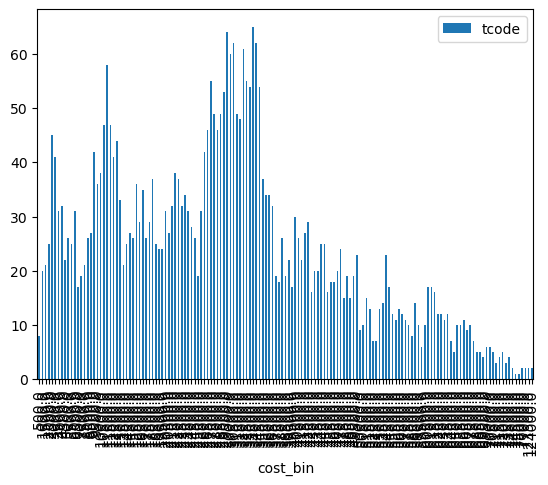

In [10]:
import matplotlib.pyplot as plt
import numpy
_df['cost_bin'] = numpy.floor(_df['cost'] / 500.0) * 500.0
stat_df = _df.groupby('cost_bin', as_index=False)['tcode'].nunique()
stat_df.sort_values('cost_bin', inplace=True)
stat_df.plot.bar(x='cost_bin', y='tcode')

In [11]:
import math
ceil_cost = avg_cost + 2 * stddev_cost
step_cnt = 256
step_size = (ceil_cost - min_cost) / step_cnt 
print(step_size)
def calc_color(cost):
    if cost > ceil_cost:
        cost = ceil_cost
    step = (step_cnt - 1) - math.floor((cost - min_cost) / step_size)
    if step < 0:
        step = 0
    color = f'#ff{step:02x}{step:02x}'
    return color
print(calc_color(537))
print(calc_color(540))
print(calc_color(1020))
print(calc_color(1021))
print(calc_color(4900))
print(calc_color(124346))
print(calc_color(124347))


247.1003260549566
#ffffff
#ffffff
#fffefe
#fffefe
#ffeeee
#ff0000
#ff0000


In [12]:
from geolib import geohash

geojson = {
    'type': 'FeatureCollection',
    'features': []
}
for index, row in _df.iterrows():
    _b = geohash.bounds(row['geohash_5'])
    color = calc_color(row['cost'])
    geojson['features'].append({
        'type': 'Feature',
        'geometry': {
            'type': 'Polygon',
            'coordinates': [[
                [_b.ne.lon, _b.sw.lat],
                [_b.ne.lon, _b.ne.lat],
                [_b.sw.lon, _b.ne.lat],
                [_b.sw.lon, _b.sw.lat],
                [_b.ne.lon, _b.sw.lat],
            ]]
        },
        'properties': {
            'title': f"{row['name']}駅： {row['cost']}",
            'description': f"{row['name']}駅： {row['cost']} = {row['price_fare'] + row['price_charge']}円 + {row['time_walk'] + row['time_other'] + row['time_board']}分",
            #'fcode': row['fcode'],
            #'tcode': row['tcode'],
            'name': row['name'],
            #'lat': row['lat'],
            #'lon': row['lon'],
            #'geohash_5': row['geohash_5'],
            'pref_code': row['pref_code'],
            'price_fare': row['price_fare'],
            'price_charge': row['price_charge'],
            'time_walk': row['time_walk'],
            'time_other': row['time_other'],
            'time_board': row['time_board'],
            "stroke": "#ff0000",
            "stroke-width": 1,
            'fill': color
            #'summary': row['summary'],
            
        }
    }
    )
    
print(geojson['features'][0])
with open('../data/result_2/railway_moving_cost.json', mode='w') as f:
    json.dump(geojson, f)

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[140.7568359375, 40.8251953125], [140.7568359375, 40.869140625], [140.712890625, 40.869140625], [140.712890625, 40.8251953125], [140.7568359375, 40.8251953125]]]}, 'properties': {'title': '青森駅： 68410', 'description': '青森駅： 68410 = 19010円 + 1482分', 'name': '青森', 'pref_code': 2, 'price_fare': 19010, 'price_charge': 0, 'time_walk': 0, 'time_other': 229, 'time_board': 1253, 'stroke': '#ff0000', 'stroke-width': 1, 'fill': '#ff0000'}}
